In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package

# Class 7 - DST Lab
## New York University

***

### Homework #2

### Final Project Proposal

## Cleaning up our FFT Code

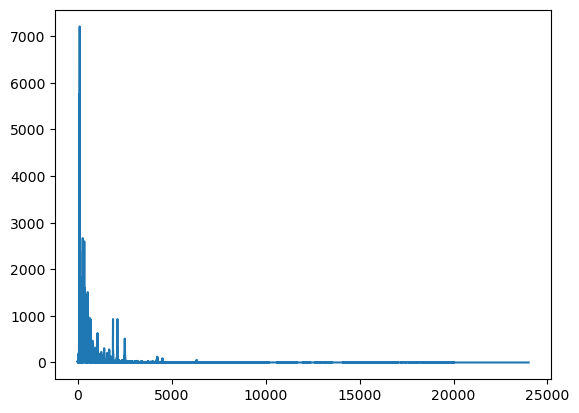

In [3]:
in_sig, srate = sf.read('sig.wav')

fft_x = np.fft.rfft(in_sig) # computes real valued fft, ignoring aliased frequencies

mag_fft = np.abs(fft_x)

f_v = np.fft.rfftfreq(len(in_sig), 1/srate)

plt.plot(f_v, mag_fft)

## Inverse Discrete Fourier Transform (IFFT)

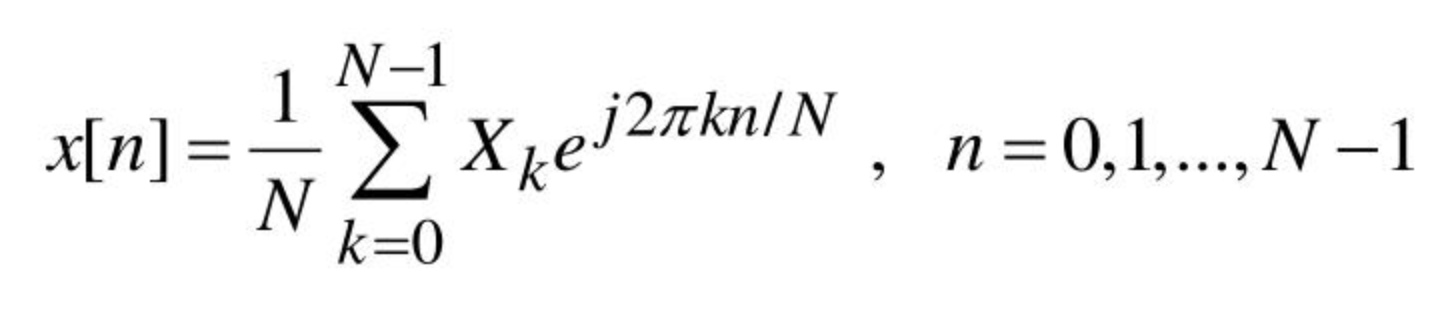

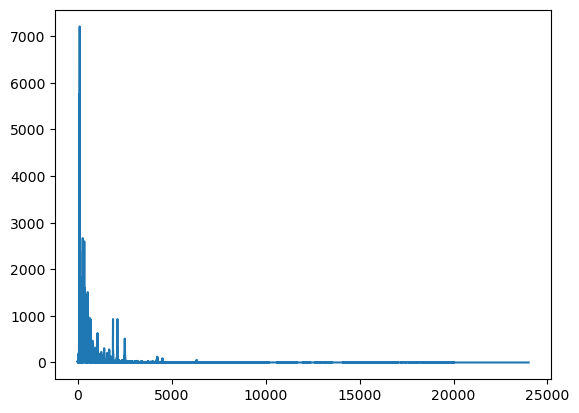

In [6]:
in_sig, srate = sf.read('sig.wav')

fft_x = np.fft.rfft(in_sig) # computes real valued fft, ignoring aliased frequencies

mag_fft = np.abs(fft_x)

f_v = np.fft.rfftfreq(len(in_sig), 1/srate)

plt.plot(f_v, mag_fft)

ifft_x = np.fft.irfft(fft_x)

Audio(ifft_x, rate = srate)

## Pitch Shifting in the frequency domain

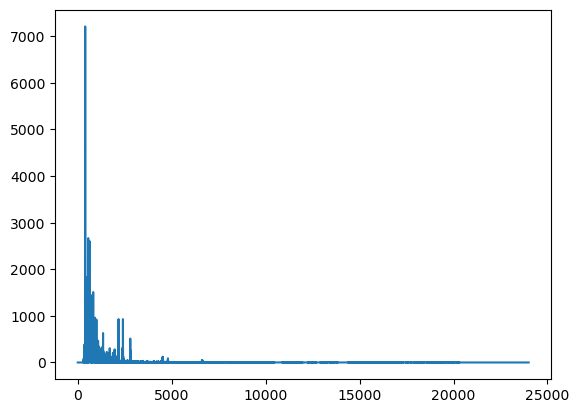

In [24]:
in_sig, srate = sf.read('sig.wav')

fft_x = np.fft.rfft(in_sig) # computes real valued fft, ignoring aliased frequencies

f_v = np.fft.rfftfreq(len(in_sig), 1/srate)

# pitch shift here
# take the value in each fft bin and shift it upwards 'n' bins

# for example: if n = 10, take the value of fft_x in bin 10 and place it 
# into bin 20 of shifted, 11 to 21 etc.

shifted = np.zeros(len(fft_x), dtype = complex)
# shifted = fft_x.copy()
# for i in range(len(shifted)):
#     shifted[i] = 0
n = 2000
for i in range(len(shifted)):
    # shifted[20] = fft_x[10] # copy value from fft_x at i - n
    # calculate the index you are grabbing form
    # make sure index is within range 0 to len(fft_x)
    index = i - n
    if (index >= 0 and index < len(fft_x)):
        shifted[i] = fft_x[index]
    
shifted[10000] = 8000
shifted[13000] = 8000
shifted[16000] = 8000

mag_fft = np.abs(shifted) #extracting mag response (ignoring phase response)
plt.plot(f_v, mag_fft)
plt.xlim(1000, 2000

ifft_x = np.fft.irfft(shifted)

Audio(ifft_x, rate = srate)

## Task: Masking Frequencies using FFT

 locate the high frequency ringing
 
 
 remove it by modifying fft_x

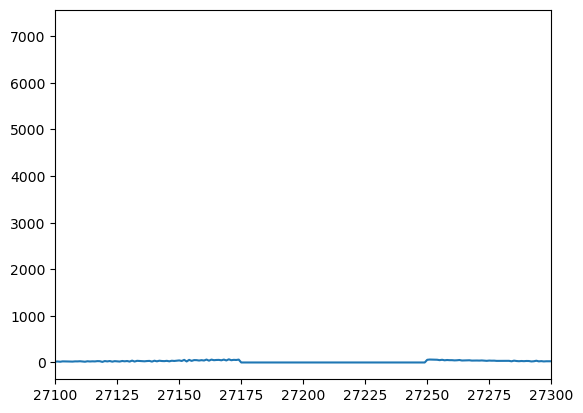

In [35]:
in_sig, srate = sf.read('sig_noise.wav')

fft_x = np.fft.rfft(in_sig) # computes real valued fft, ignoring aliased frequencies

fft_x[27212] = 0 # removes one frequency

#27175 - 27250 

for i in range(27175, 27250):
    fft_x[i] = 0

mag_fft = np.abs(fft_x)

f_v = np.fft.rfftfreq(len(in_sig), 1/srate)

# plt.plot(f_v, mag_fft) # plots magnitude vs frequency of bin
plt.plot(mag_fft) # plots magnitude vs index of bin
# modify fft_x using index of ringing, not frequency
plt.xlim(27100, 27300)

ifft_x = np.fft.irfft(fft_x)

Audio(ifft_x, rate = srate)

## Pitch Detector using FFT

In [44]:
# Notes to display
TOP_NOTES = 3

# Names of the notes
NOTE_NAMES = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

# https://newt.phys.unsw.edu.au/jw/notes.html
def freq_to_number(f): 
    return 69 + 12*np.log2(f/440.0)

def number_to_freq(n): 
    return 440 * 2.0**((n-69)/12.0)

def note_name(n): 
    return NOTE_NAMES[n % 12] + str(int(n/12 - 1))

def sine_gen(amplitude, frequency, phase, duration, sample_rate):
    t_v = np.arange(0, duration, 1/sample_rate) 
    output = amplitude * np.sin(2 * np.pi * frequency * t_v + phase)
    return output

38399.99999999999 24000 221.0
57.07851415040126
A3


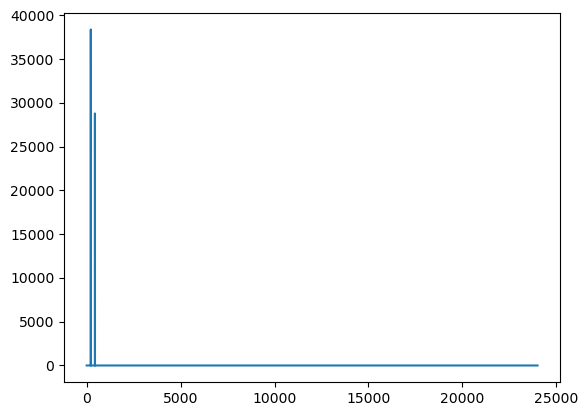

In [48]:
# define a signal to analyze
sr = 48000

sine_length = 1

#Sine 1
sine_1 = sine_gen(1.6, 221, 0, sine_length, sr)
sine_2 = sine_gen(1.2, 441, 0, sine_length, sr)

sine_m = sine_1 + sine_2

#FFT
fft_x = np.fft.rfft(sine_m)

f_v = np.fft.rfftfreq(len(sine_m), 1/sr)

mag_x = abs(fft_x)

plt.plot(f_v, mag_x)

max_fft = -1
max_index = -1

for i in range(len(mag_x)):
    if(mag_x[i] > max_fft):
        max_fft = mag_x[i]
        max_index = i
        
print(max_fft, i, f_v[max_index])

print(freq_to_number(f_v[max_index]))

print(note_name(int(round(freq_to_number(f_v[max_index])))))

## Short Time Fourier Transform

compute Fourier transform over only a segment of a long signal

reasons:
- perception: ear analyzes short segments of signal
- hardware: fourier transform is inefficient and memory consuming for very long input segments

multiply your signal with a window

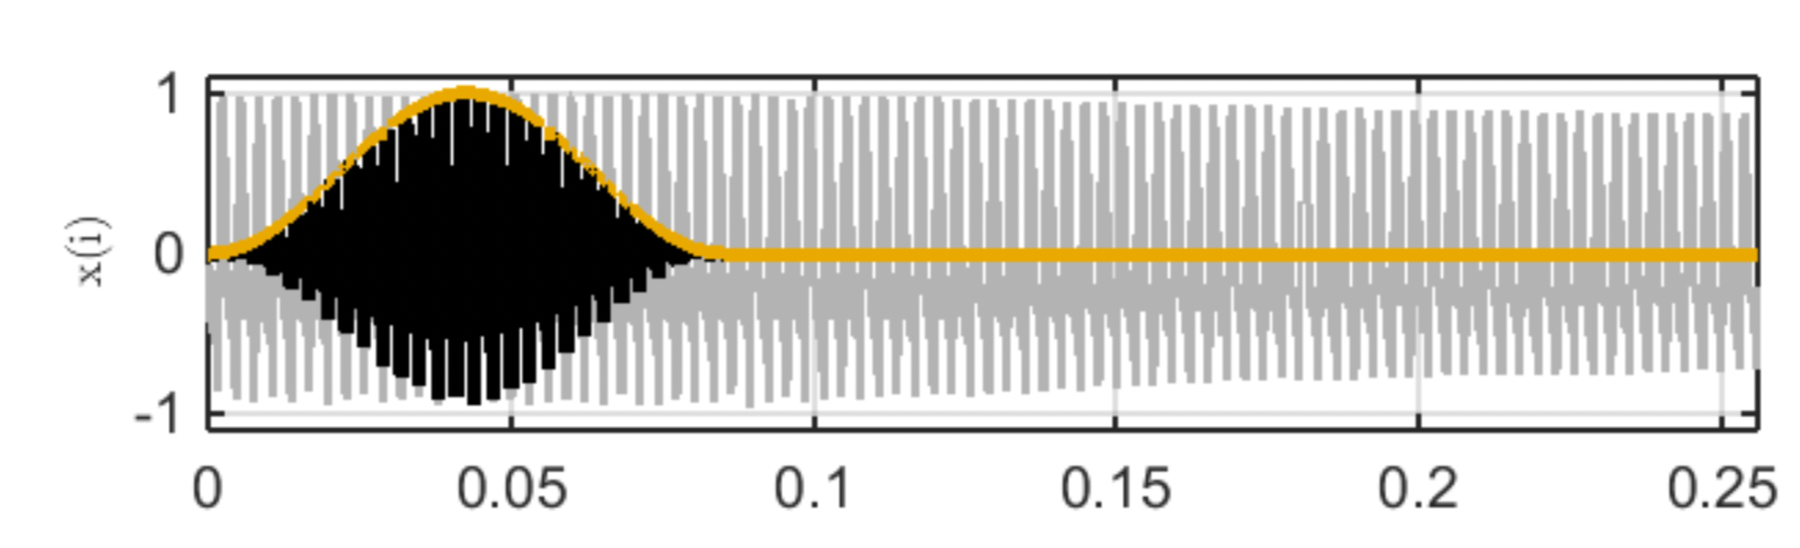

Simplest case: rectangular window

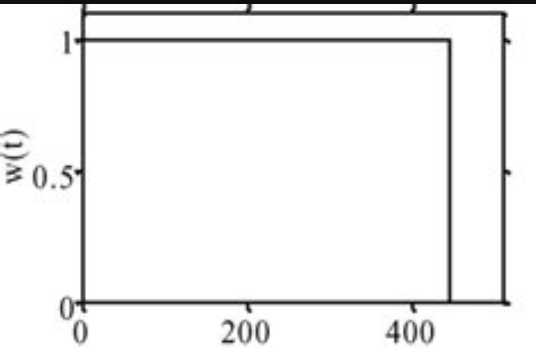

Any given window shape will impart its own frequency response on the frequency response of the signal you are analyzing

Fourier transform of a rectangular window:

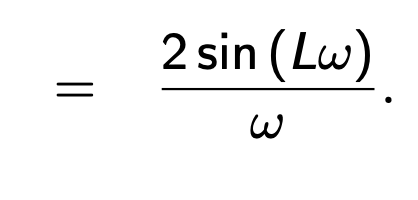


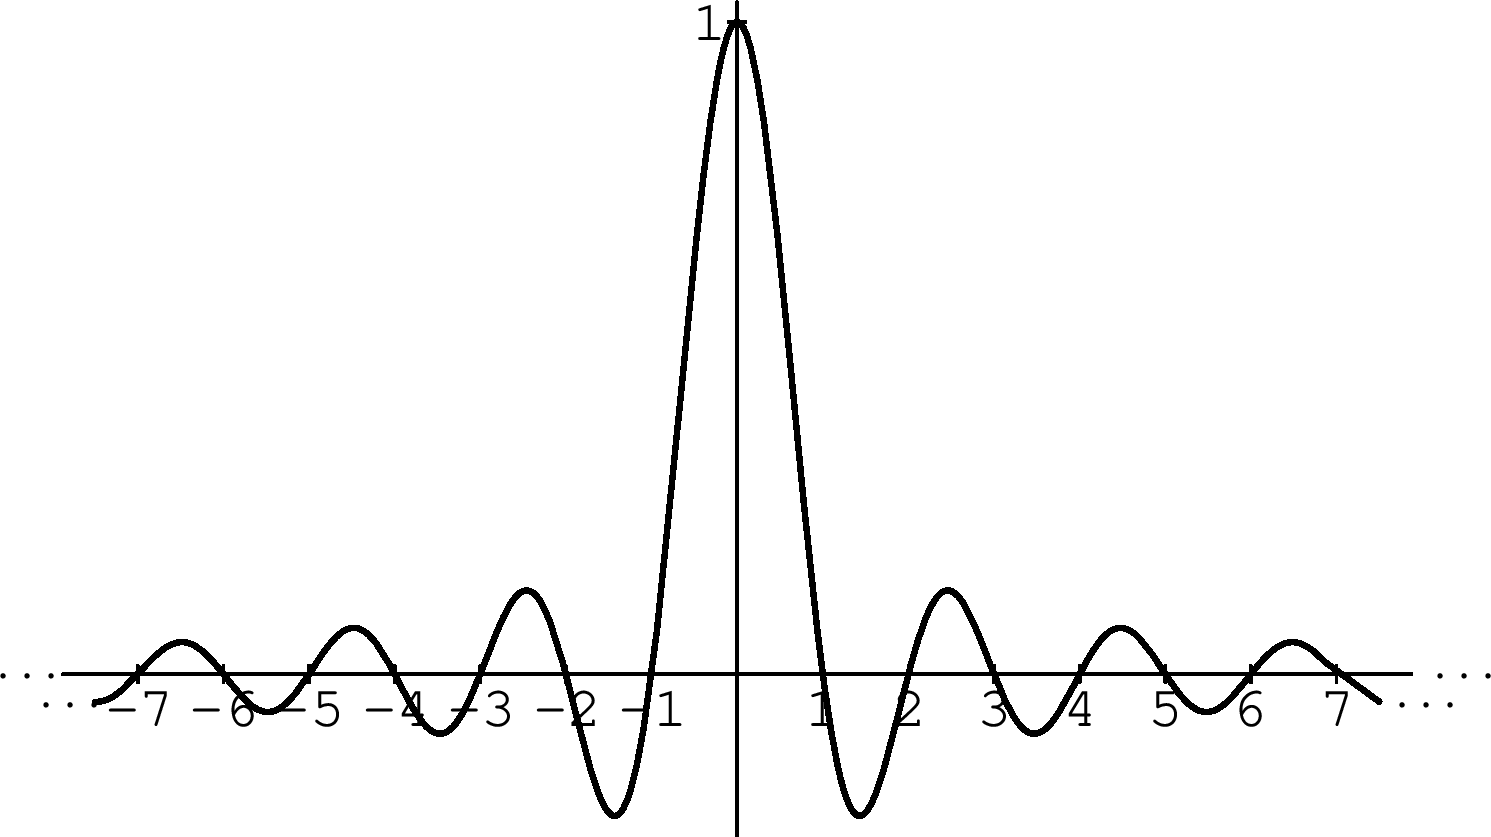

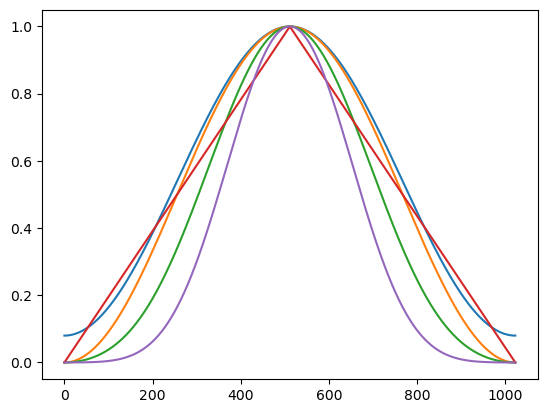

In [41]:
plt.plot(np.hamming(1024))
plt.plot(np.hanning(1024))
plt.plot(np.blackman(1024))
plt.plot(np.bartlett(1024))
plt.plot(np.kaiser(1024, 14)) # 0 is rect, 5 similar to hamming, 6 similar to hanning, 8.6 similar to blackman

Main lobe width
- how much does the main lobe smear a peak

Side lobe height
- how dominant is the highest side lobe

Side lobe attenuation/fall-off
- how much influence do distant side lobes have

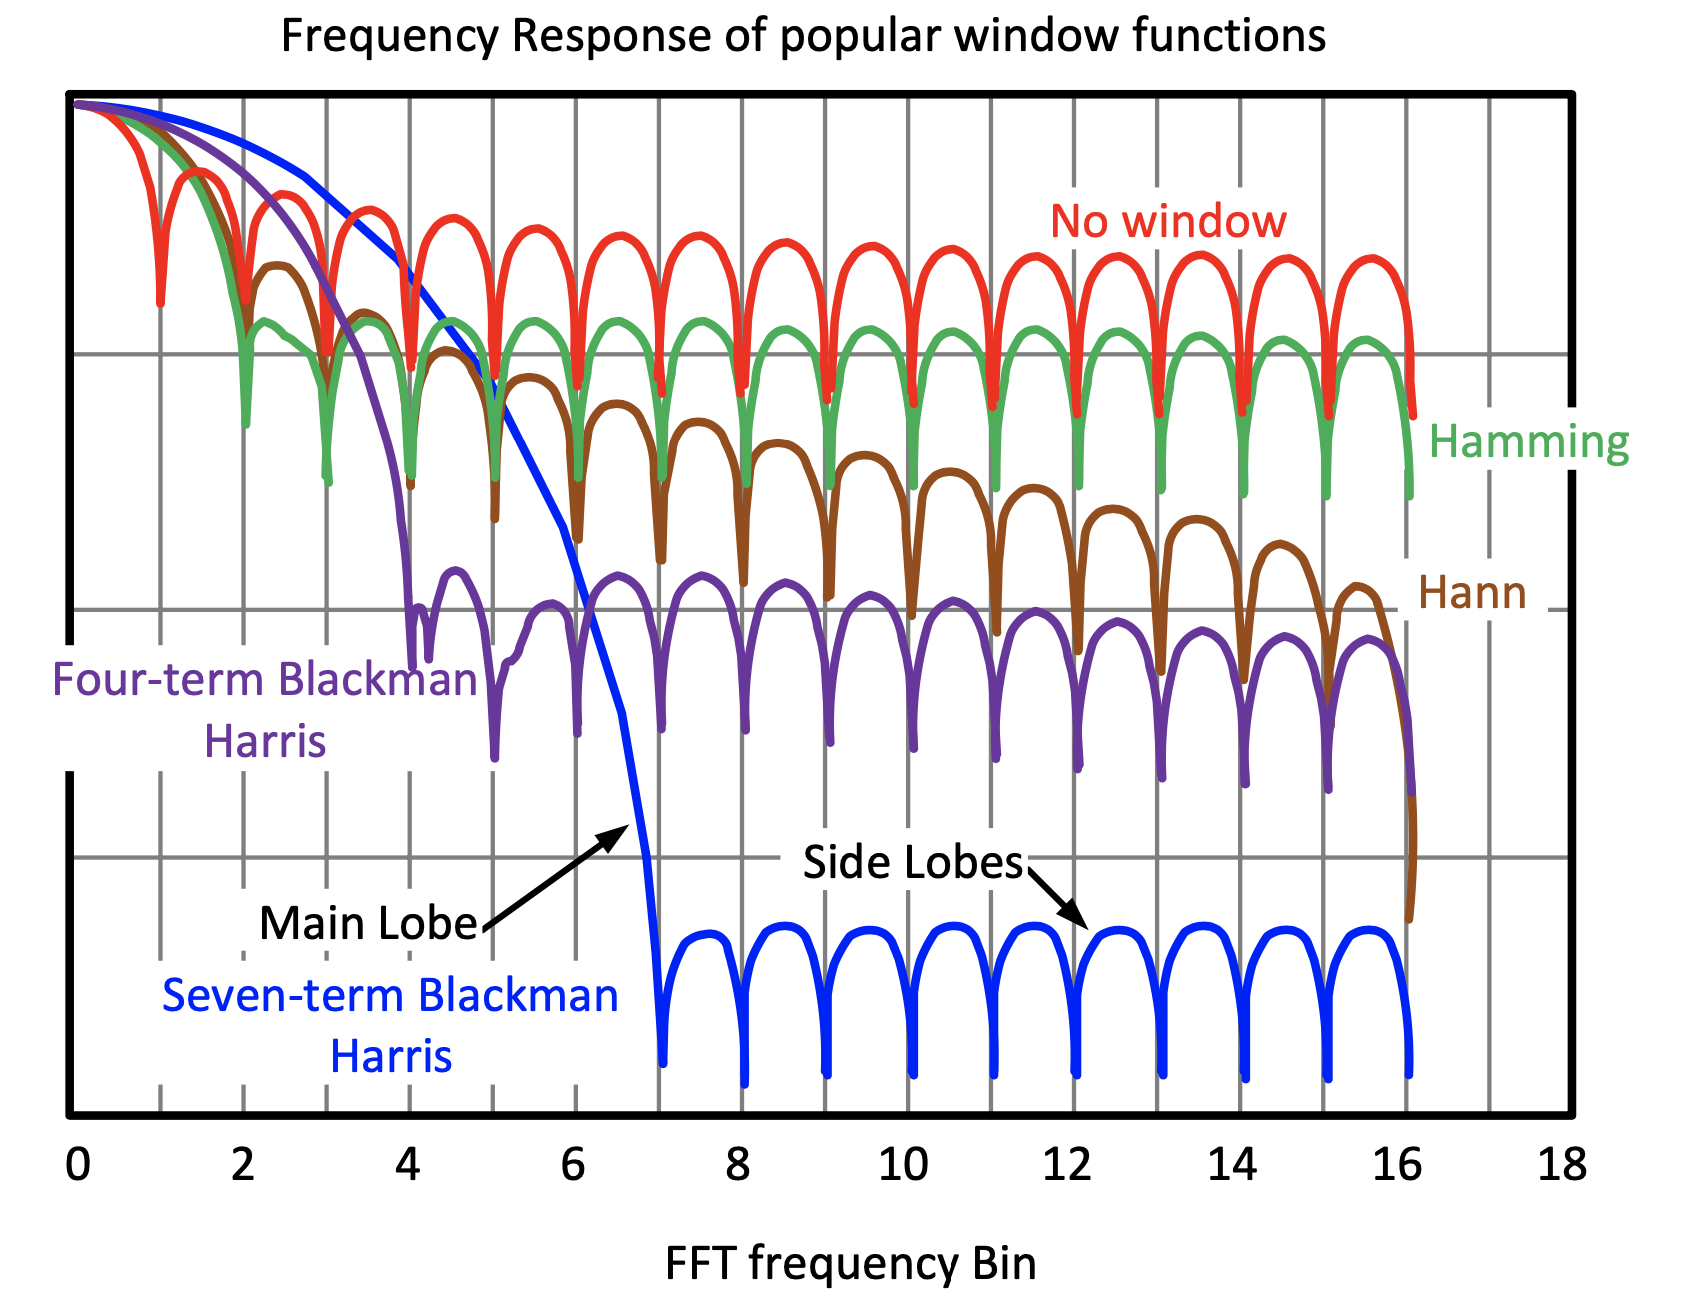

### STFT Resolution

DFT resolution depends on:
   - block length
   - sample rate
   
Increasing DFT length increases frequency resolution:
   - longer block length (decreases time resolution)
   - zero-padding (adding extra zeros to end of block to artificially inflate length)

In order to analyze the development of the frequency content of a signal over time, the audio vector will have to be broken into smaller "chunks" of data.

 - Create a function that generates a matrix that contains a signal broken into buffers.
 - Each column of the matrix will represent a different moment in time
 - The length of each column (number of rows) will be defined by the user

## FFT Windows

## Creating FFT Windows (or musical envelopes)


## Frequency Response of FFT Windows